# Computational Methods in Stochastics - Assignment 5

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
n = 20
x_mean = 30
sd = 20

mu_init = 3
tau_init = 1

a = 1
b = 1
c = 3
d = 0.01

N = 100000
BINS = 50

def normal(x, m, var):
    std = np.sqrt(var)
    squared_diff = np.power(x - m, 2)
    denominator = std * np.sqrt(2 * np.pi)
    exponent = -squared_diff / (2 * var)
    result = np.exp(exponent) / denominator
    return result

def gamma(x, a, b):
    ba = b**a
    x_pow = x**(a - 1)
    exp_term = np.exp(-b * x)
    factorial_a_minus_1 = np.math.factorial(a - 1)
    result = ba * x_pow * exp_term / factorial_a_minus_1
    return result

def generate_data(N, mu_init, tau_init, n, d, x_mean, c, sd, a, b):
    data = np.empty((N, 2))
    mu = mu_init
    tau = tau_init
    data[0] = [mu, tau]

    for i in tqdm(range(1, N)):
        mu_prec = n * tau + d
        std_dev = np.sqrt(1 / mu_prec)
        mu_mean = (c * d + n * tau * x_mean) / mu_prec
        mu = np.random.normal(mu_mean, std_dev)

        numerator = (n - 1) * sd + n * (x_mean - mu)**2
        tau_b = b + numerator / 2
        tau_a = a + n / 2
        tau = np.random.gamma(tau_a, 1 / tau_b)
        data[i] = [mu, tau]

    return data


In [ ]:
data = np.empty((N, 2))
data = generate_data(N, mu_init, tau_init, n, d, x_mean, c, sd, a, b)

100%|██████████| 99999/99999 [00:00<00:00, 160753.59it/s]


In [ ]:
abs_diff = np.abs(data[:, 0] - np.mean(data[:, 0]))
mean_abs_diff = np.mean(abs_diff)
mu_burnin_index = np.where(abs_diff < mean_abs_diff)[0][0]
mu_burnin = int(mu_burnin_index)
print("Mu burn-in time: " + str(mu_burnin) + " iterations")

Mu burn-in time: 1 iterations


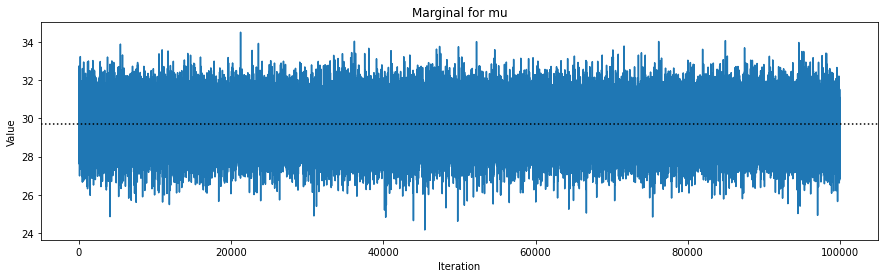

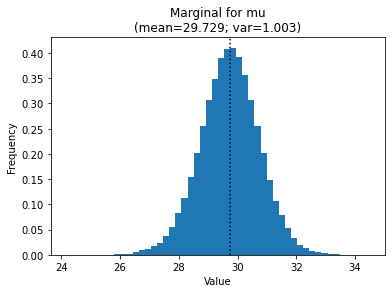

In [ ]:
plt.figure(figsize=(15, 4))
plt.plot(np.arange(mu_burnin, N), data[mu_burnin:, 0])
plt.axhline(y=np.mean(data[mu_burnin:, 0]), linestyle=":", linewidth=1.5, color="black")
plt.title("Marginal for mu")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.show()

plt.hist(data[mu_burnin:, 0], bins=BINS, density=True)
x_values = np.arange(30 - 0.00015, 30 + 0.00015, 0.000001)
y_values = Normal(x_values, np.mean(data[mu_burnin:, 0]), np.var(data[mu_burnin:, 0]))
plt.plot(x_values, y_values)
plt.axvline(x=np.mean(data[mu_burnin:, 0]), linestyle=":", linewidth=1.5, color="black")
title = "Marginal for mu\n(mean={:.3f}; var={:.3f})".format(np.mean(data[mu_burnin:, 0]), np.var(data[mu_burnin:, 0]))
plt.title(title)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
abs_diff_tau = np.abs(data[:, 1] - np.mean(data[:, 1]))
mean_abs_diff_tau = np.mean(abs_diff_tau)
tau_burnin_index = np.where(abs_diff_tau < mean_abs_diff_tau)[0][0]
tau_burnin = int(tau_burnin_index)
print("Tau burn-in time: " + str(tau_burnin) + " iterations")

Tau burn-in time: 2 iterations


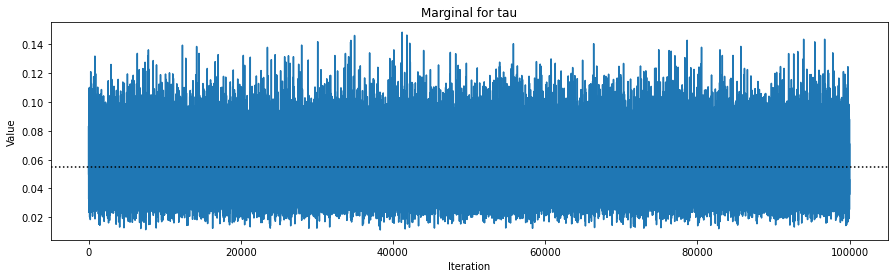

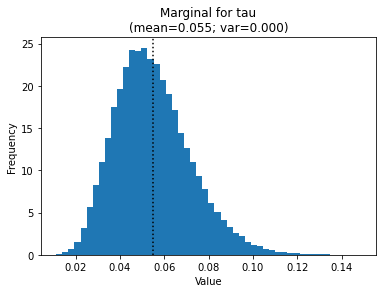

In [ ]:
plt.figure(figsize=(15, 4))
plt.plot(np.arange(tau_burnin, N), data[tau_burnin:, 1])
plt.axhline(y=np.mean(data[tau_burnin:, 1]), linestyle=":", linewidth=1.5, color="black")
plt.title("Marginal for tau")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.show()

plt.hist(data[tau_burnin:, 1], bins=BINS, density=True)
plt.axvline(x=np.mean(data[tau_burnin:, 1]), linestyle=":", linewidth=1.5, color="black")
title = "Marginal for tau\n(mean={:.3f}; var={:.3f})".format(np.mean(data[tau_burnin:, 1]), np.var(data[tau_burnin:, 1]))
plt.title(title)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

Overall burn-in time: 2 iterations


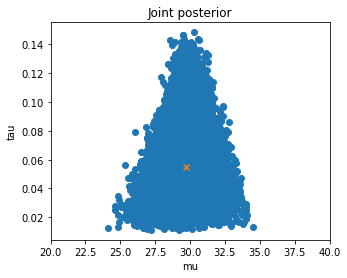

In [ ]:
overall_burn_in_time = max(mu_burnin, tau_burnin)
print("Overall burn-in time: " + str(int(overall_burn_in_time)) + " iterations")

plt.figure(figsize=(5, 4))
plt.title("Joint posterior")
plt.xlabel("mu")
plt.ylabel("tau")
plt.xlim(20, 40)
data_range = data[max(mu_burnin, tau_burnin):, :]
plt.scatter(data_range[:, 0], data_range[:, 1])
plt.scatter(np.mean(data_range[:, 0]), np.mean(data_range[:, 1]), marker='x')
plt.show()